# **FIONA HARIA | 60009220048 | D1-2 | D040**

# **1. Importing Libraries**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2

# **2. Reading MNIST Dataset**

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels)=tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **3. Reading Random images from the MNIST dataset**

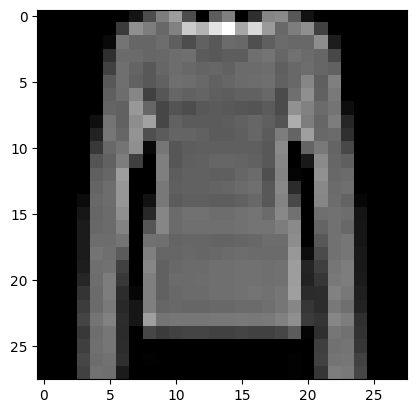

In [9]:
import random
image = random.choice(train_images)
plt.imshow(image,cmap="gray")
plt.show()

# **4. Performing Histogram Equlization**

**Calculates pixel frequencies**

In [10]:
def get_pixel_freq(image):
    pix_freq = np.zeros(256)
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            pix_val = image[row][col]
            pix_freq[pix_val] += 1
    return pix_freq

**Histogram equlization function**

In [11]:
def histogram_equalization(image):
    if len(image.shape) == 3: #converting to grayscale
        image = np.mean(image, axis=2).astype(np.uint8)

    pixel_freq = get_pixel_freq(image)
    pixel_pdf = pixel_freq / np.sum(pixel_freq)
    pixel_cumsum = np.cumsum(pixel_pdf)
    L = 256
    bits_cumsum = (L - 1) * pixel_cumsum
    pixel_map = np.fix(bits_cumsum).astype(int)

    output_image = np.zeros_like(image)

    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            pixel_val = image[row][col]
            output_image[row][col] = pixel_map[pixel_val]

    return output_image

**Histogram Plotting function**

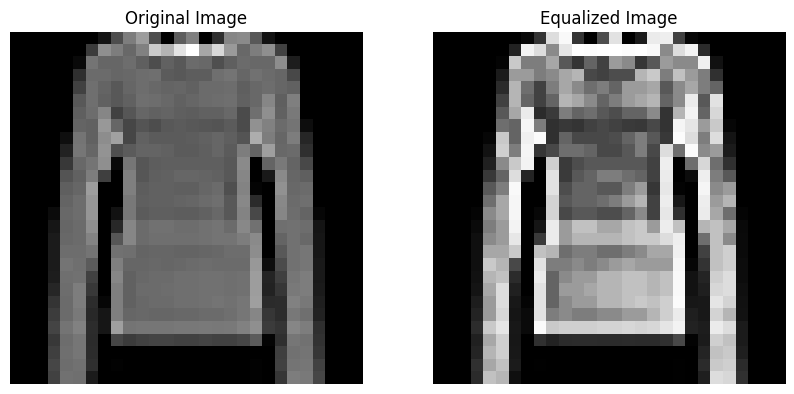

In [12]:
equalized_image = histogram_equalization(image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.show()

# **5. Difference in the histograms of the before and after images**

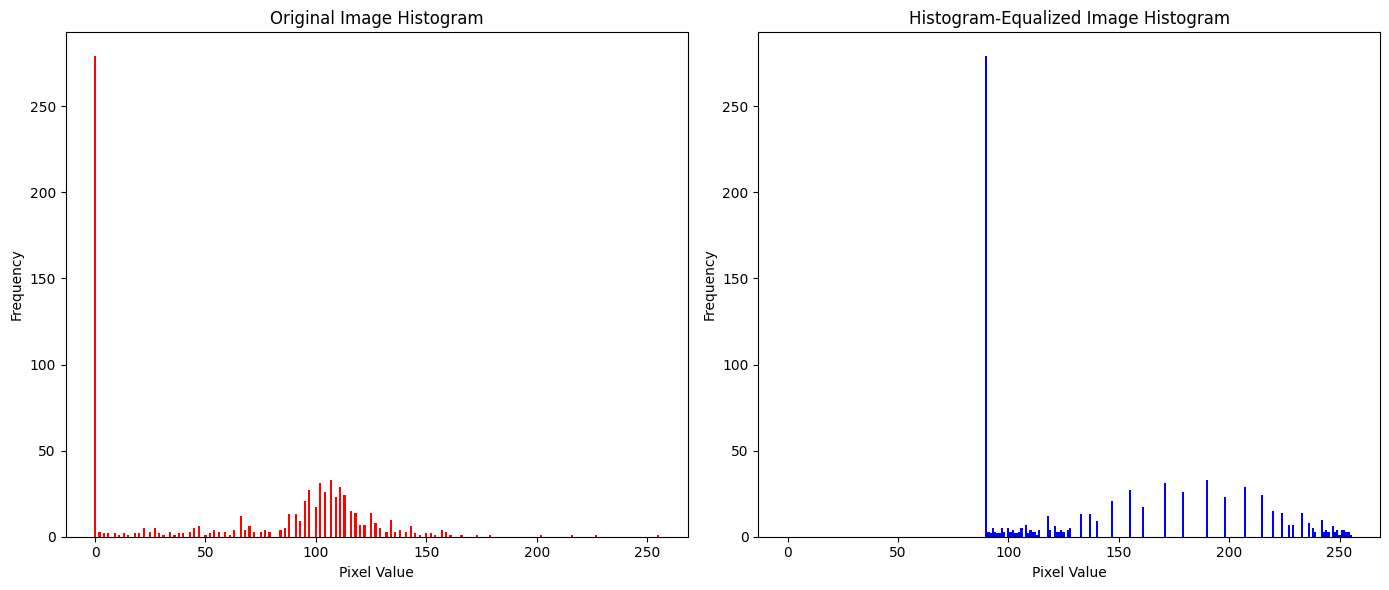

In [15]:
original_freq = get_pixel_freq(image)
equalized_freq = get_pixel_freq(equalized_image)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image Histogram')
plt.bar(np.arange(256), original_freq, width=1, color='red')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.title('Histogram-Equalized Image Histogram')
plt.bar(np.arange(256), equalized_freq, width=1, color='blue')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **6. Reason for increased image contrast**


By comparing the histograms of the original and equalized images, we can observe that the contrast of the image has **increased** after histogram equalization. This is because the pixel values in the equalized image are more evenly distributed across the entire range of intensity levels (0-255), resulting in a wider range of intensities and an enhanced visual contrast.

In the original image, the pixel values were concentrated in a narrower range, leading to a lower contrast. After equalization, the pixel values are more spread out, thereby increasing the contrast.

# **7. Perfoming Histogram stretching to increase contrast**

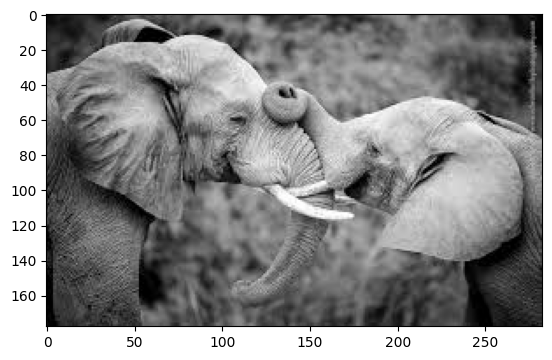

In [22]:
img = cv2.imread("elephant.jpg")
plt.imshow(img,cmap="gray")
plt.show()

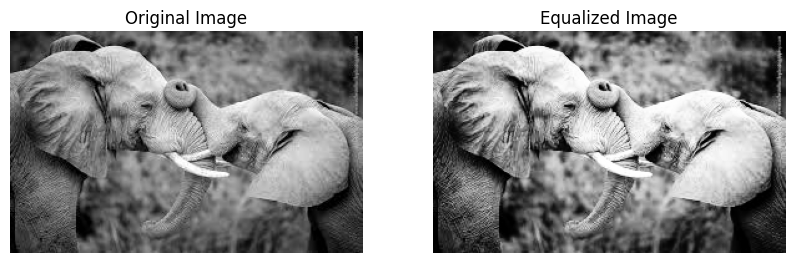

In [23]:
equalized_image = histogram_equalization(img)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.show()

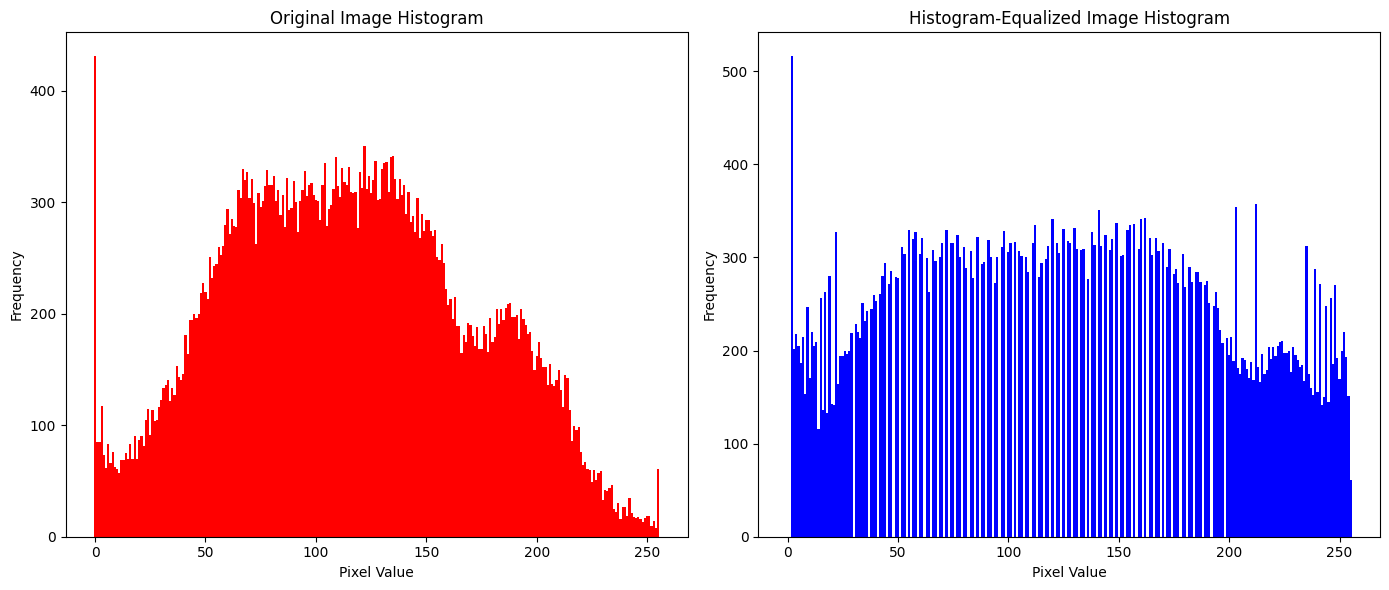

In [24]:
original_freq = get_pixel_freq(img)
equalized_freq = get_pixel_freq(equalized_image)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image Histogram')
plt.bar(np.arange(256), original_freq, width=1, color='red')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.title('Histogram-Equalized Image Histogram')
plt.bar(np.arange(256), equalized_freq, width=1, color='blue')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **Applications**

1. **Medical Imaging**: Enhancing contrast in X-rays, CT scans, and MRI images to improve visibility of subtle details like tumors or fractures.

2. **Satellite Imagery**: Improving the clarity and detail of satellite images for better analysis of land cover, vegetation, and urban areas.

3. **Digital Photography**: Enhancing the dynamic range and visual appeal of photographs, especially in low-light or high-contrast scenes.

4. **Video Processing**: Improving the visibility and quality of video footage, particularly in surveillance or security applications.


# **Observations**

1. The histogram of the original image might show pixel values clustered in certain ranges. After histogram equalization, the histogram generally becomes more uniformly distributed across the entire range of pixel values. This is because histogram equalization adjusts the pixel values to cover the full range more evenly.

2. The contrast of the original image might be limited, especially if most pixel values are concentrated in a narrow range. Histogram equalization enhances the contrast by spreading out the pixel values.

3. The histogram might have one or more peaks, reflecting the predominant pixel values or intensity ranges in the image. The histogram will typically appear flatter and more spread out. The goal of equalization is to distribute pixel values more uniformly.


# **Conclusions**

1. Increased Contrast: Histogram equalization enhances the contrast of the image by spreading out pixel values more evenly across the entire range. This results in improved visibility of image details, particularly in areas that were previously dark or light.

2. Better Visibility: Histogram equalization ensures that the pixel values utilize the entire dynamic range of the image, from the minimum to the maximum intensity values. This can improve the overall visual quality of the image by making better use of the available intensity levels.
